In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel(r'Sales.xlsx', engine='openpyxl')

In [72]:
df

,revenue,prA,prB,prC,prD
0,335003,1,2,4,14
1,288366,1,2,3,14
2,278296,2,1,3,14
3,278551,2,1,3,13
4,273514,2,1,4,12
...,...,...,...,...,...
76,239621,3,8,4,3
77,186362,2,8,4,3
78,145787,2,7,4,2
79,227235,4,9,6,2


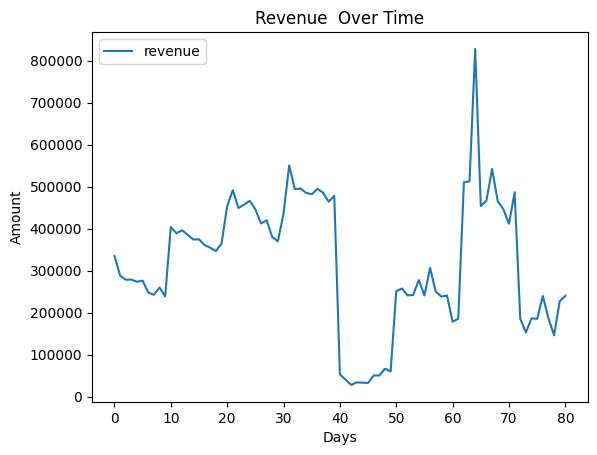

In [82]:


df[['revenue']].plot(kind='line')
plt.title('Revenue  Over Time')
plt.xlabel('Days')
plt.ylabel('Amount')
plt.show()

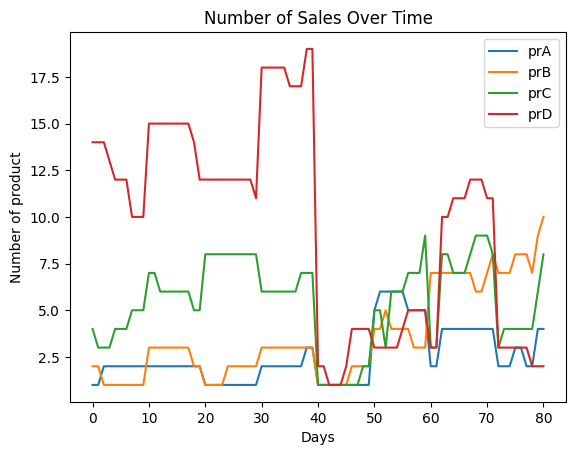

In [81]:
import matplotlib.pyplot as plt

df[['prA', 'prB', 'prC', 'prD']].plot(kind='line')
plt.title('Number of Sales Over Time')
plt.xlabel('Days')
plt.ylabel('Number of product')
plt.show()

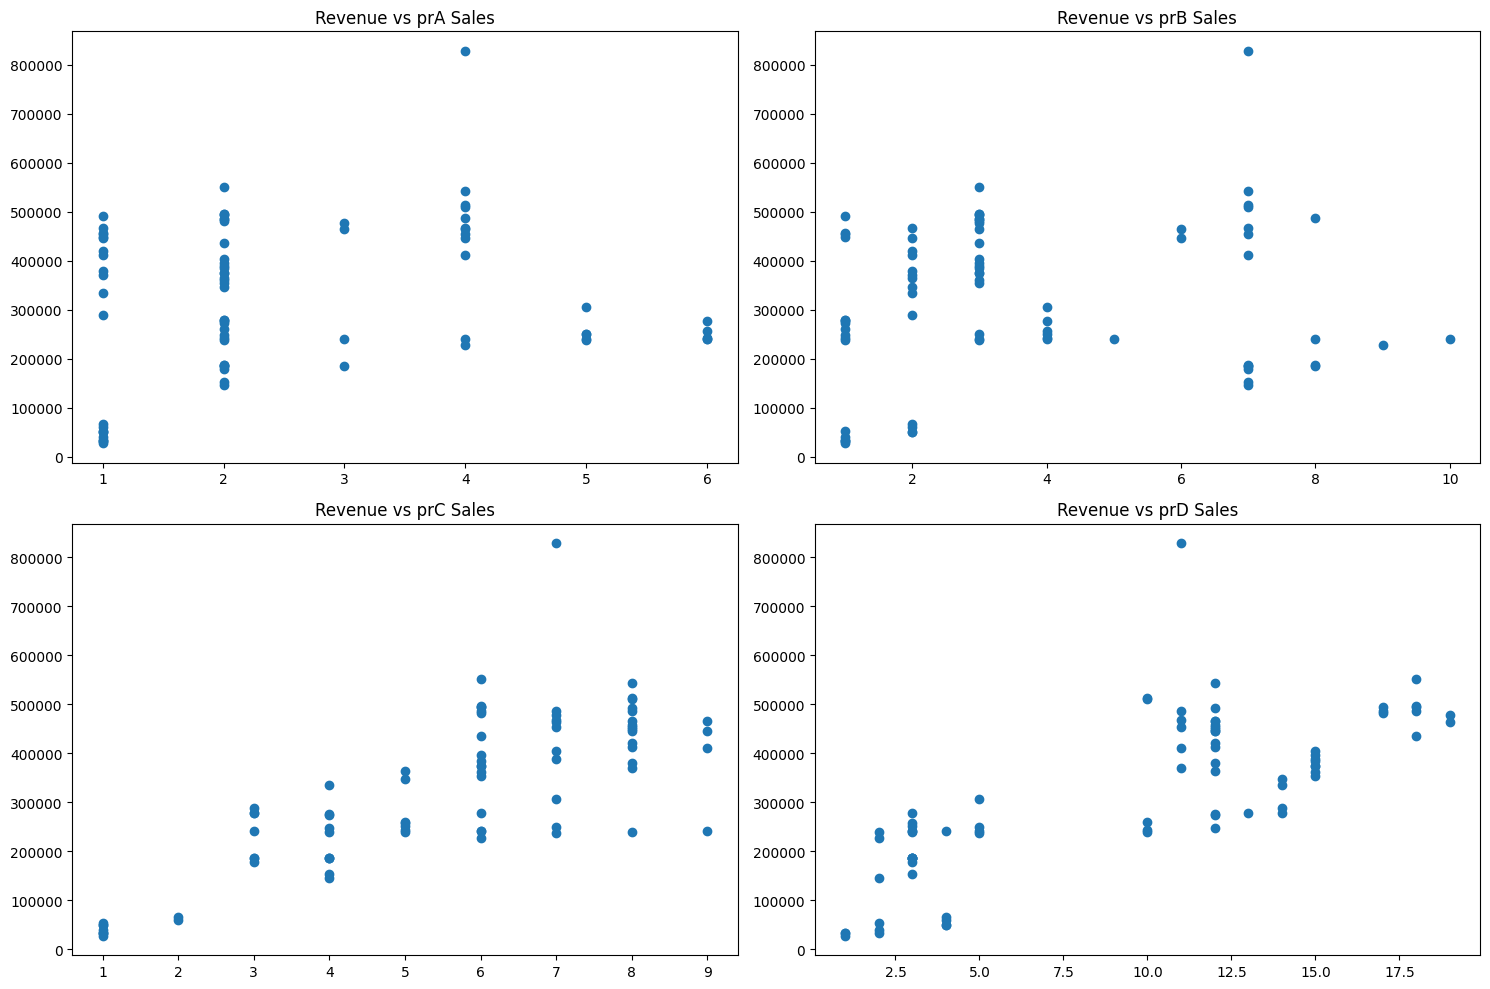

In [75]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs[0, 0].scatter(df['prA'], df['revenue'])
axs[0, 0].set_title('Revenue vs prA Sales')
axs[0, 1].scatter(df['prB'], df['revenue'])
axs[0, 1].set_title('Revenue vs prB Sales')
axs[1, 0].scatter(df['prC'], df['revenue'])
axs[1, 0].set_title('Revenue vs prC Sales')
axs[1, 1].scatter(df['prD'], df['revenue'])
axs[1, 1].set_title('Revenue vs prD Sales')
plt.tight_layout()
plt.show()


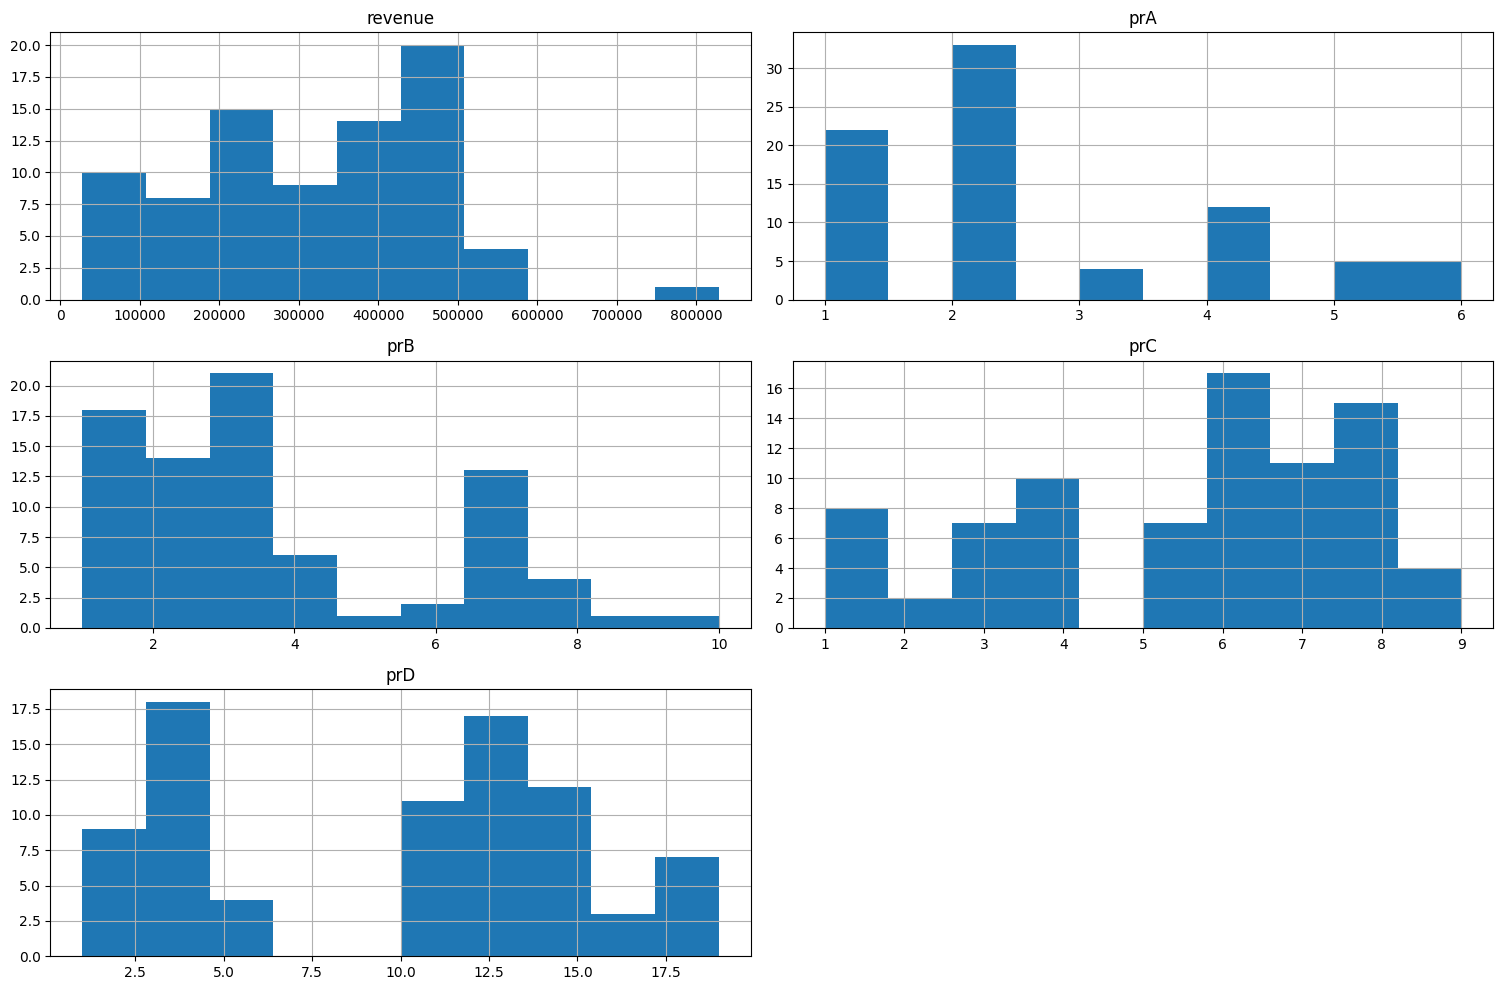

In [80]:
df[['revenue', 'prA', 'prB', 'prC', 'prD']].hist(bins=10, figsize=(15, 10))
plt.tight_layout()
plt.show()


In [86]:
X = df[['prA', 'prB', 'prC', 'prD']]  # features
y = df['revenue']  # target variable
# Create a Linear Regression model

model = LinearRegression()
# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [87]:
# Print the coefficients
print("Average price of product A: ", model.coef_[0])
print("Average price of product B: ", model.coef_[1])
print("Average price of product C: ", model.coef_[2])
print("Average price of product D: ", model.coef_[3])

Average price of product A:  6461.832510085264
Average price of product B:  12454.645409297806
Average price of product C:  27753.91505747305
Average price of product D:  17944.05530188272


In [6]:

# assuming df is your DataFrame
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [7]:
import torch
import pyro
import pyro.distributions as dist
from pyro.infer import MCMC, NUTS

c:\Users\mohit\.conda\envs\pytorch_1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# Convert the DataFrame to PyTorch tensors
item1 = torch.tensor(df['prA'].values, dtype=torch.float)
item2 = torch.tensor(df['prB'].values, dtype=torch.float)
item3 = torch.tensor(df['prC'].values, dtype=torch.float)
item4 = torch.tensor(df['prD'].values, dtype=torch.float)
revenue = torch.tensor(df['revenue'].values, dtype=torch.float)


In [64]:

def model(item1, item2, item3, item4, revenue):
    # Prior distributions for the regression coefficients
    alpha = pyro.sample("alpha", dist.Normal(1000, 100))
    beta1 = pyro.sample("beta1", dist.Normal(17000, 5000))
    beta2 = pyro.sample("beta2", dist.Normal(12000, 2000))
    beta3 = pyro.sample("beta3", dist.Normal(6000, 1000))
    beta4 = pyro.sample("beta4", dist.Normal(7000, 5000))
    sigma = pyro.sample("sigma", dist.HalfNormal(10.0))

    # Expected revenue
    mu = alpha + beta1 * item1 + beta2 * item2 + beta3 * item3 + beta4 * item4

    # Likelihood
    with pyro.plate("data", len(revenue)):
        pyro.sample("obs", dist.Normal(mu, sigma), obs=revenue)


In [107]:

def model(item1, item2, item3, item4, revenue):
    # Prior distributions for the regression coefficients
    alpha = pyro.sample("alpha", dist.Normal(1000, 100))
    beta1 = pyro.sample("beta1", dist.Uniform(15000, 20000))
    beta2 = pyro.sample("beta2", dist.Uniform(15000, 17000))
    beta3 = pyro.sample("beta3", dist.Uniform(12000, 15000))
    beta4 = pyro.sample("beta4", dist.Uniform(10000, 12000))

    # Expected revenue
    mu = alpha + beta1 * item1 + beta2 * item2 + beta3 * item3 + beta4 * item4

    # Likelihood
    with pyro.plate("data", len(revenue)):
        pyro.sample("obs", dist.HalfNormal(mu), obs=revenue)


In [109]:
# we know that actual price range, so adding
def model(item1, item2, item3, item4, revenue):
    # Prior distributions for the regression coefficients
    alpha = pyro.sample("alpha", dist.Normal(1000, 100))
    beta1 = pyro.sample("beta1", dist.Normal(17000, 2000))
    beta2 = pyro.sample("beta2", dist.Normal(16000, 1000))
    beta3 = pyro.sample("beta3", dist.Normal(13000, 1000))
    beta4 = pyro.sample("beta4", dist.Normal(11000, 1000))

    # Expected revenue
    mu = alpha + beta1 * item1 + beta2 * item2 + beta3 * item3 + beta4 * item4

    # Likelihood
    with pyro.plate("data", len(revenue)):
        pyro.sample("obs", dist.HalfNormal(mu), obs=revenue)


In [110]:

# Use No-U-Turn Sampler (NUTS) for MCMC
nuts_kernel = NUTS(model)

# Run MCMC
mcmc = MCMC(nuts_kernel, num_samples=1000, warmup_steps=200)
mcmc.run(item1, item2, item3, item4, revenue)



Sample: 100%|██████████| 1200/1200 [00:24, 49.10it/s, step size=7.55e-01, acc. prob=0.910]


In [114]:
mcmc.summary()


                mean       std    median      5.0%     95.0%     n_eff     r_hat
     alpha   1002.54     99.28   1004.25    839.11   1163.66   1547.78      1.00
     beta1  16927.49   2000.66  16873.34  13984.58  20472.08   1264.29      1.00
     beta2  15962.59   1007.10  15968.48  14372.35  17660.48    829.67      1.00
     beta3  13389.12    999.86  13423.53  11953.57  15244.21   1057.38      1.00
     beta4  11967.47    838.97  11940.06  10599.95  13318.79   1219.65      1.00

Number of divergences: 0


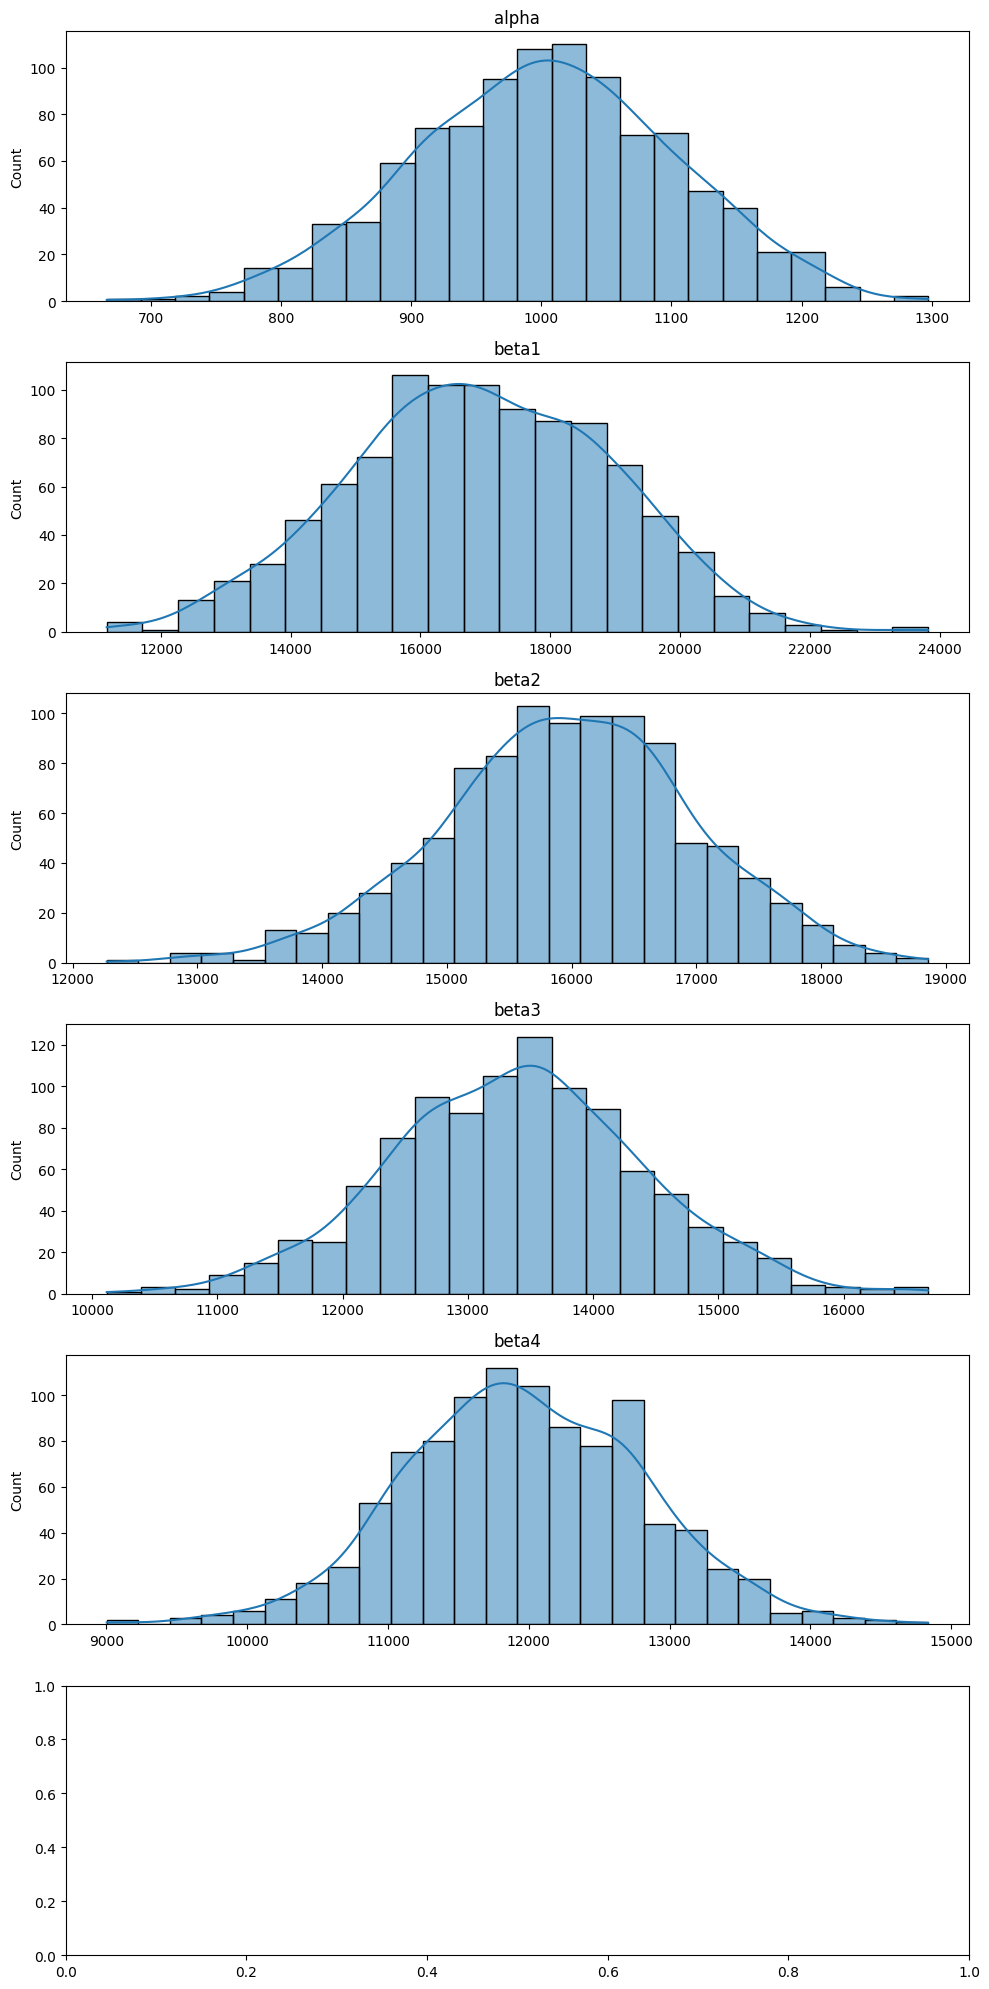

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the posterior samples
samples = mcmc.get_samples()

# Plot the samples for each parameter
fig, axs = plt.subplots(6, figsize=(10, 20))

for i, (name, values) in enumerate(samples.items()):
    sns.histplot(values, ax=axs[i], kde=True)
    axs[i].set_title(name)

plt.tight_layout()
plt.show()


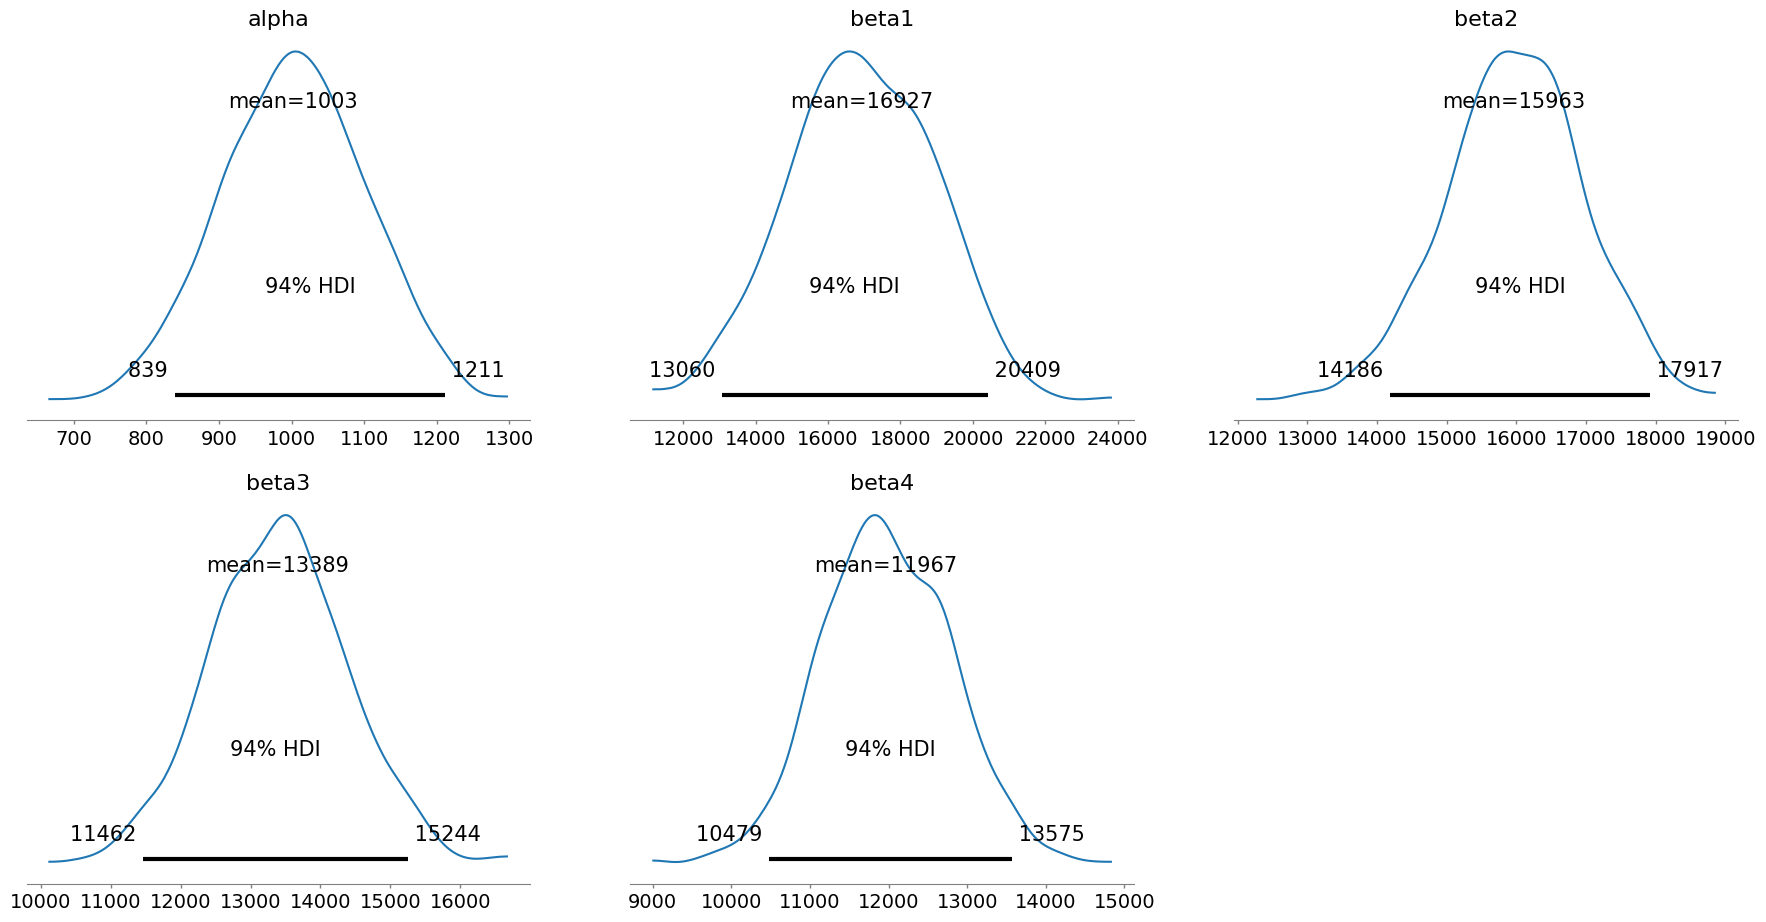

In [116]:
import arviz as az

# Convert Pyro's MCMC output to an ArviZ data structure
posterior_samples = mcmc.get_samples()
idata = az.from_pyro(mcmc)

# Use ArviZ to plot the posterior
az.plot_posterior(idata)
plt.show()


In [122]:
df_test #Test Dataset

,revenue,prA,prB,prC,prD
30,435775,2,3,6,18
0,335003,1,2,4,14
22,449188,1,1,8,12
31,550627,2,3,6,18
18,346497,2,2,5,14
28,379809,1,2,8,12
10,403796,2,3,7,15
70,411549,4,7,9,11
4,273514,2,1,4,12
12,396080,2,3,6,15


In [118]:

# Convert the DataFrame to PyTorch tensors
new_item1 = torch.tensor(df_test['prA'].values, dtype=torch.float)
new_item2 = torch.tensor(df_test['prB'].values, dtype=torch.float)
new_item3 = torch.tensor(df_test['prC'].values, dtype=torch.float)
new_item4 = torch.tensor(df_test['prD'].values, dtype=torch.float)
new_revenue = torch.tensor(df_test['revenue'].values, dtype=torch.float)


In [119]:

def predictive_model(item1, item2, item3, item4):
    # Prior distributions for the regression coefficients
    alpha = pyro.sample("alpha", dist.Normal(1000, 100))
    beta1 = pyro.sample("beta1", dist.Normal(17000, 2000))
    beta2 = pyro.sample("beta2", dist.Normal(16000, 1000))
    beta3 = pyro.sample("beta3", dist.Normal(13000, 1000))
    beta4 = pyro.sample("beta4", dist.Normal(11000, 1000))

    # Expected revenue
    mu = alpha + beta1 * item1 + beta2 * item2 + beta3 * item3 + beta4 * item4

    return pyro.sample("revenue", dist.HalfNormal(mu))


In [120]:

# Get the posterior samples
posterior_samples = mcmc.get_samples()

# Generate predictions for the new data points
predictions = [predictive_model(new_item1, new_item2, new_item3, new_item4) for _ in posterior_samples]

# Convert the predictions to a tensor
predictions = torch.stack(predictions)

# Compute the mean of the predictions
predicted_revenue = predictions.mean(dim=0)

# Compute the mean absolute error

mae = (predicted_revenue - new_revenue).abs().mean()
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 131647.22


In [ ]:
# Convert tensors to numpy arrays
predicted_revenue_np = predicted_revenue.detach().numpy()
new_revenue_np = new_revenue.detach().numpy()

# Create a DataFrame
df_results = pd.DataFrame({
    'Predicted Revenue': predicted_revenue_np,
    'Actual Revenue': new_revenue_np,
})

print(df_results)

    Predicted Revenue  Actual Revenue
0       243770.703125        435775.0
1       174385.640625        335003.0
2       267450.343750        449188.0
3       428132.187500        550627.0
4       249336.921875        346497.0
5       271560.000000        379809.0
6       470237.500000        403796.0
7       367235.031250        411549.0
8        90298.359375        273514.0
9       167833.781250        396080.0
10      102238.648438         59975.0
11      356588.937500        495715.0
12      248260.156250        542450.0
13      370890.843750        481973.0
14      242146.953125        465435.0
15       54375.851562         32318.0
16      131196.375000        152711.0
